# <center> Simulador da Copa do Mundo  

> Isenção de responsabilidade 1: Por favor, não use isso para fins de apostas. Este é apenas um experimento matemático feito por um cientista de dados. Não sou um apostador e não quero dar sugestões sobre suas apostas. <p>
> Isenção de responsabilidade 2: Este projeto não está relacionado de forma alguma a todos os eventos do Catar que estão acontecendo atualmente e não é patrocinador ou anti-patrocinador da Copa do Mundo da FIFA 2022 no Catar. <p> <br>
    
Então deixe-me dizer, em poucas palavras, o que você verá aqui:

1. Construiremos algum tipo de função de probabilidade para os resultados das partidas;
2. Faremos uma simulação com base nas probabilidades que extraímos~;
3. Executaremos a simulação várias vezes e extrairemos algumas estatísticas.    

# 1. Primeiros Passos
Vamos importar algumas bibliotecas primeiro:

In [2]:
import numpy             as np
import pandas            as pd 
import matplotlib.pyplot as plt 
import seaborn           as sns

In [3]:
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'sans-serif' 
plt.rcParams['font.serif'] = 'Ubuntu' 
plt.rcParams['font.monospace'] = 'Ubuntu Mono' 
plt.rcParams['font.size'] = 14 
plt.rcParams['axes.labelsize'] = 12 
plt.rcParams['axes.labelweight'] = 'bold' 
plt.rcParams['axes.titlesize'] = 12 
plt.rcParams['xtick.labelsize'] = 12 
plt.rcParams['ytick.labelsize'] = 12 
plt.rcParams['legend.fontsize'] = 12 
plt.rcParams['figure.titlesize'] = 12 
plt.rcParams['image.cmap'] = 'jet' 
plt.rcParams['image.interpolation'] = 'none' 
plt.rcParams['figure.figsize'] = (12, 10) 
plt.rcParams['axes.grid']=True
plt.rcParams['lines.linewidth'] = 2 
plt.rcParams['lines.markersize'] = 8
colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd: goldenrod', 'xkcd:cadet blue',
'xkcd:scarlet']

# 2. Importa dados 

O conjunto de dados que usei é um conjunto de dados das partidas e o número de vezes que uma seleção nacional venceu ou passou da fase de grupos, como veremos.


In [7]:
data_matches  = pd.read_csv('WorldCupMatches.csv')
data_winner   = pd.read_csv('WorldCups.csv')
data_players  = pd.read_csv('WorldCupPlayers.csv')

In [11]:
data_matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [9]:
data_winner.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607


In [10]:
data_players.head()

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN


# 3. EDA


Agora deixe-me fazer algumas explorações. Vamos começar com o óbvio e ver quantas vezes cada seleção já venceu a Copa do Mundo antes:


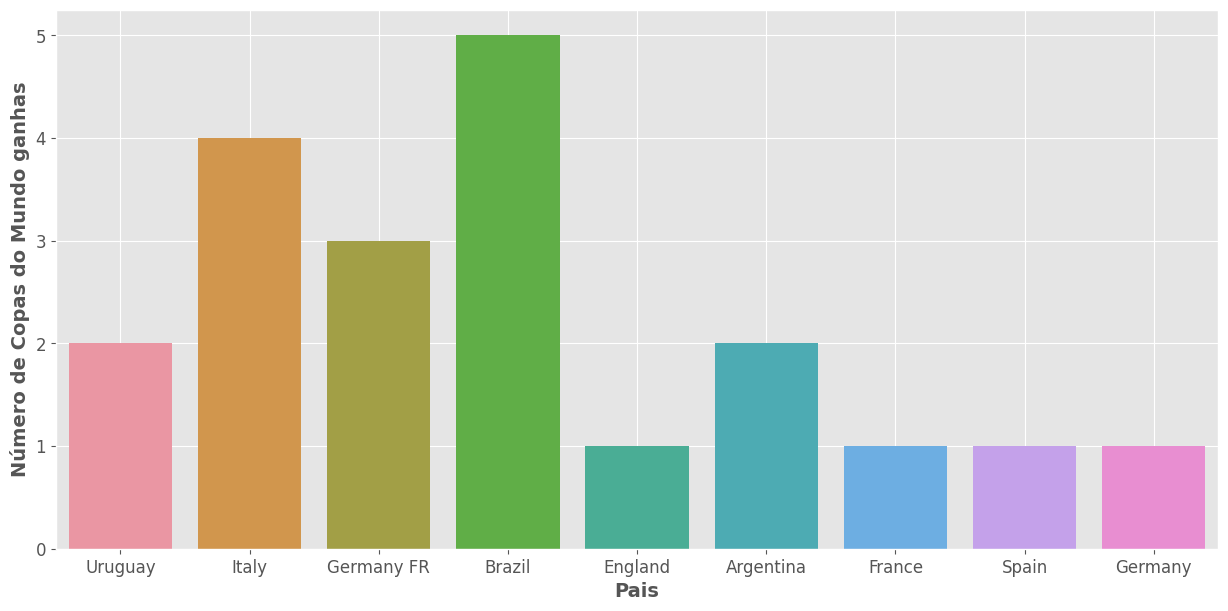

In [21]:
plt.figure(figsize=(15,7))
sns.countplot(data=data_winner, x='Winner')
plt.grid(True)

plt.ylabel('Número de Copas do Mundo ganhas',fontsize=14)
plt.xlabel('Pais',fontsize=14);

O Brasil venceu 5, a Itália venceu 4 e a Argentina venceu 2 duas.

Outra coisa bacana que podemos explorar está relacionada ao fato de que, no dataset das partidas, temos também a fase do torneio. É interessante explorá-lo porque o número de vezes que um país passou da fase de grupos é obviamente um indicativo da qualidade daquela seleção.

Vamos dar uma olhada:

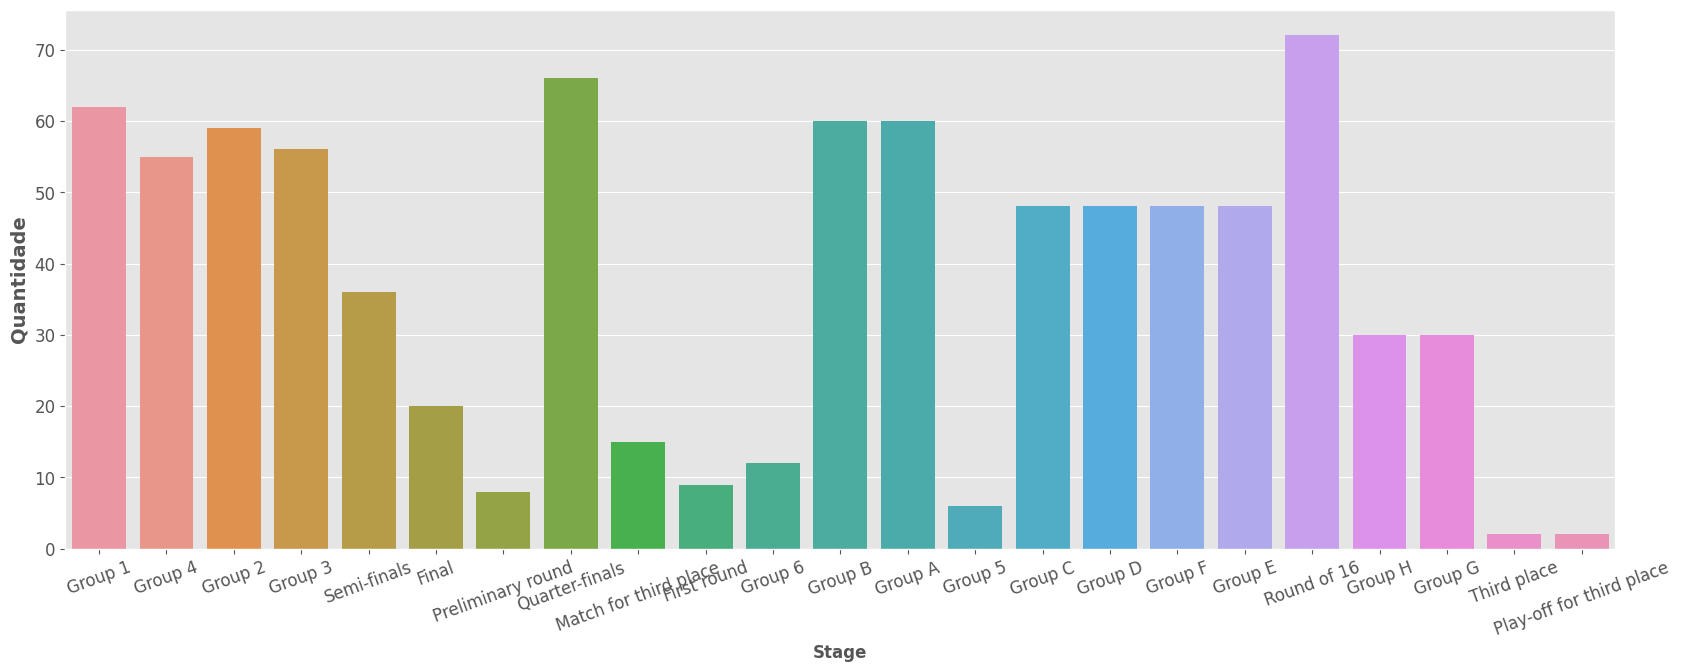

In [27]:
plt.figure(figsize=(20,7))
sns.countplot(data=data_matches,  x='Stage')
plt.ylabel('Quantidade',fontsize=14)
plt.xticks(rotation=20);

Portanto, temos muitos jogos da fase de grupos, mas apenas algumas eliminatórias. Isso faz todo o sentido porque, claro, você tem vários grupos, mas apenas uma fase eliminatória.

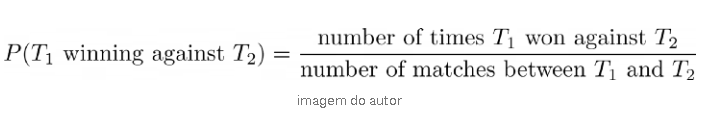

# 3. Modelando a Distribuição de Probabilidade
Agora que a parte chata está feita, vamos aos detalhes de como vamos simular esta Copa do Mundo.

Temos nossas equipes e suas partidas. Digamos que você tenha o Time 1 (T_1) e o Time 2 (T_2). Qual é a probabilidade de que o Time 1 vença a partida? <p> <br>

# <center> $ P(T1 \; vencendo\; T2)= \frac{número \;de\; vezes\; que\; T1\; venceu\; contra\;T2}{número \;de\; correspondências\; entre \;T1\; e \;T2} $
    
    

Sobre o empate: claro, duas equipes podem empatar na fase de grupos, mas não podem empatar na fase eliminatória. Eu vou te dizer como lidar com isso mais tarde.

# <center> $ P(T1\;vencedor) = \frac{número\;de\;vezes\;que\;T1\;venceu}{número\;de\;jogos\;de\;T1} $
    

É claro que é o mesmo para empatar ou perder.
    
Para isso, precisamos da seguinte coluna para as partidas, que chamamos de "Result":
    

In [106]:

filtro_1 = data_matches['Home Team Goals']==data_matches['Away Team Goals']
filtro_2 = data_matches['Home Team Goals']>data_matches['Away Team Goals']
filtro_3 = data_matches['Home Team Goals']<data_matches['Away Team Goals']

data_matches['Result'][filtro_1] = data_matches[filtro_1] ['Away Team Name']
data_matches['Result'][filtro_2] = data_matches[filtro_2] ['Away Team Name']
data_matches['Result'][filtro_3] = data_matches[filtro_3] ['Away Team Name']

In [107]:
data_matches['Result'] .unique()

array(['Mexico', 'Belgium', 'Brazil', 'Peru', 'France', 'Bolivia',
       'Paraguay', 'Romania', 'Chile', 'USA', 'Yugoslavia', 'Argentina',
       'Egypt', 'Netherlands', 'Switzerland', 'Sweden', 'Draw', 'Hungary',
       'Spain', 'Austria', 'Germany', 'Czechoslovakia',
       'Dutch East Indies', 'Norway', 'Poland', 'Cuba', 'Italy',
       'England', 'Scotland', 'Turkey', 'Korea Republic', 'Germany FR',
       'Uruguay', 'Northern Ireland', 'Soviet Union', 'Wales', 'Colombia',
       'Bulgaria', 'Korea DPR', 'Portugal', 'Israel', 'Morocco',
       'El Salvador', 'Australia', 'Haiti', 'Zaire', 'German DR',
       'IR Iran', 'Tunisia', 'Iran', 'New Zealand', 'Algeria', 'Kuwait',
       'Iraq', 'Denmark', 'Canada', 'Cameroon',
       'rn">United Arab Emirates', 'Costa Rica',
       'rn">Republic of Ireland', 'Saudi Arabia', 'Russia', 'Greece',
       'Nigeria', 'South Africa', 'Japan', 'Croatia', 'Jamaica',
       'Senegal', 'Slovenia', 'Ecuador', 'China PR', "C�te d'Ivoire",
       'Cze

Agora temos que selecionar o time para a Copa do Mundo do Catar. Não dá muito trabalho e podemos simplesmente copiar e colar do site. Eu fiz isso por você.

In [108]:
qatar_team_list = ["Argentina",
"Australia",
"Belgium",
"Brazil" ,
"Cameroon", 
"Canada" ,
"Costa Rica", 
"Croatia" ,
"Denmark" ,
"Ecuador" ,
"England" ,
"France" ,
"Germany" ,
"Ghana" ,
"IR Iran",
"Japan" ,
"Korea Republic",
"Mexico",
"Morocco", 
"Netherlands",
"Poland",
"Portugal",
"Qatar",
"Saudi Arabia",
"Senegal",
"Serbia",
"Spain",
"Switzerland",
"Tunisia",
"Uruguay",
"USA",
"Wales"]

Agora temos que combinar os dados que temos com a lista da equipe. Temos que ter certeza de que temos todas as equipes que estarão no Catar no conjunto de dados.

In [109]:
team_list = list(set(data_matches['Home Team Name']))
for t in qatar_team_list:
    if t not in team_list:
        print('Houston, we have a problem with team %s'%(t))
qatar_probabilities = {'Win':0.20,'Draw':0.20,'Lose':0.60}

Houston, we have a problem with team IR Iran
Houston, we have a problem with team Qatar


Então, ironicamente, o Catar é o único time que não temos em nosso conjunto de dados. Trataremos disso mais tarde. Vamos adicionar um dicionário qatar_probabilities por enquanto, que é uma espécie de probabilidade realista inventada de quantos jogos o Qatar pode realmente vencer na Copa do Mundo.

Agora, se quisermos fazer a conversão de probabilidade, vamos usar a seguinte função:

In [128]:
def select_team_statistics(team):    
    data_team     = data_matches[(data_matches['Home Team Name']==team)| (data_matches['Away Team Name']==team)]
    winning_count = len(data_team[data_team['Result']==team])
    draw_count    = len(data_team[data_team['Result']=='Draw'])
    lose_count    = len(data_team)-winning_count-draw_count
    
    return data_team,{'Vitórias':winning_count,'Empate':draw_count,'Derrota':lose_count}

E vamos traçar alguns resultados aleatórios:

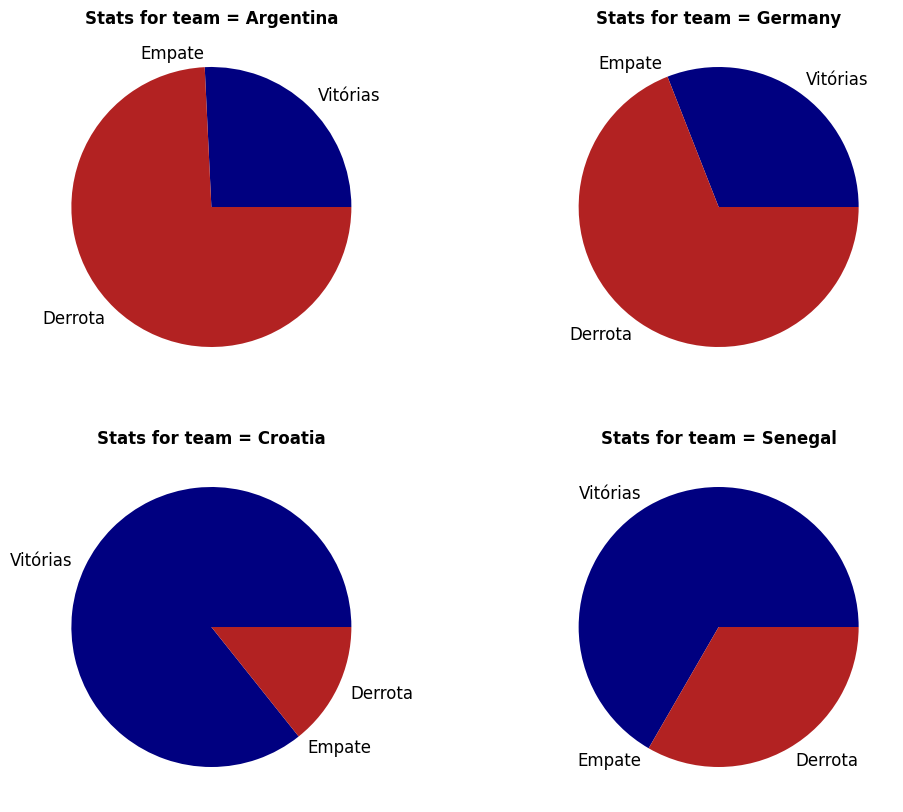

In [129]:
for i in range(1,5):
    plt.subplot(2,2,i)
    random_team = np.random.choice(qatar_team_list)
    plt.title('Stats for team = %s'%(random_team),fontweight='bold')
    team_data,stats = select_team_statistics(random_team)
    labels, values = stats.keys(),stats.values()
    plt.pie(values, labels = labels,colors=['navy','darkorange','firebrick'])

Agora, tudo bem, mas precisamos fazer a probabilidade para as partidas , não apenas para times individuais. Estamos aplicando a regra acima da seguinte maneira:

In [145]:
def select_match_statistics(team_A, team_B):
    data_team = data_matches[(data_matches['Home Team Name']==team_A)& (data_matches['Away Team Name']==team_B)]
    #data_team = data_team.append(data_matches[(data_matches['Home Team Name']==team_B)& (data_matches['Away Team Name']==team_A)])
    len_data = len(data_team)
    
    if len_data==0:
        print('Esses times nunca jogaram um contra o outro')
    else:
        print('Estas equipes se enfrentaram %i vezes'%(len_data))
    
    team_A_win = len(data_team[data_team.Result==team_A])
    team_B_win = len(data_team[data_team.Result==team_B])
    draw = len(data_team[data_team.Result=='Draw'])
    
    return data_team,{team_A:team_A_win,team_B:team_B_win,'Draw':draw}

In [153]:
data_match,stats = select_match_statistics('Brazil','Italy')

Estas equipes se enfrentaram 2 vezes
